### Topic Names
#### Topic 0: Privacy and Safety Concerns and Opinions on Camera Surveillance
#### Topic 1: Personal Experiences and Directions
#### Topic 2: Object Descriptions and Movement Observations

In [6]:
from empath import Empath
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [10]:
file_path = 'C:/Users/user/OneDrive - Oulun yliopisto/Documents/suomi24/Data/suomi24_with_best_topics_reduced_merged.csv'
df = pd.read_csv(file_path)
df.head(3)

,msg_type,datetime,title,thread_id,comment_id,topic_name_top,topic_name_leaf,thread_text,processed_text,topic,probability,new_topic,new_topic_reduced,new_topics_merged
0,thread_start,2001-01-18 17:18:00,Questions about Estonia,89742,0,Society,# The world's going on #,- Why did an important piece of evidence (from...,important piece evidence front gate fall depth...,-1,"[0.00024663890393194777, 0.0002609580195334291...",-1,0,0
1,comment,2001-01-19 01:28:00,Questions about Estonia,89742,386913,Society,# The world's going on #,I think they had other things to do. - First o...,think thing first kin demanded sepulchre would...,-1,"[4.407680431440068e-05, 5.50752101119947e-05, ...",-1,0,0
2,comment,2001-01-19 06:21:00,Questions about Estonia,89742,386914,Society,# The world's going on #,"- Not the bow gate, but its SARANA- &gt; a str...",bow gate sarana strange coincidence fell resea...,-1,"[7.977215291569503e-05, 8.425016920408031e-05,...",-1,0,0


In [8]:
# Initialize Empath
lexicon = Empath()

# Define a function to extract empath categories
def extract_empath_categories(text):
    return lexicon.analyze(text, normalize=True)

# Apply the function to each topic
tqdm.pandas(desc="Applying Empath Analysis")
empath_results = df['processed_text'].progress_apply(extract_empath_categories)

# Convert the results to a DataFrame
empath_df = pd.DataFrame(list(empath_results))
empath_df

Applying Empath Analysis: 100%|██████████| 273304/273304 [28:00<00:00, 162.63it/s]


,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.046875,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.016393,0.000000,0.000000,...,0.0,0.0,0.0,0.032787,0.016393,0.0,0.000000,0.0,0.016393,0.000000
2,0.0,0.014085,0.0,0.014085,0.0,0.000000,0.0,0.000000,0.014085,0.000000,...,0.0,0.0,0.0,0.014085,0.014085,0.0,0.000000,0.0,0.084507,0.000000
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.222222,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273299,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
273300,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
273301,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
273302,0.0,0.000000,0.0,0.111111,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [16]:
empath_df.to_csv("suomi24_empath_categories.csv")

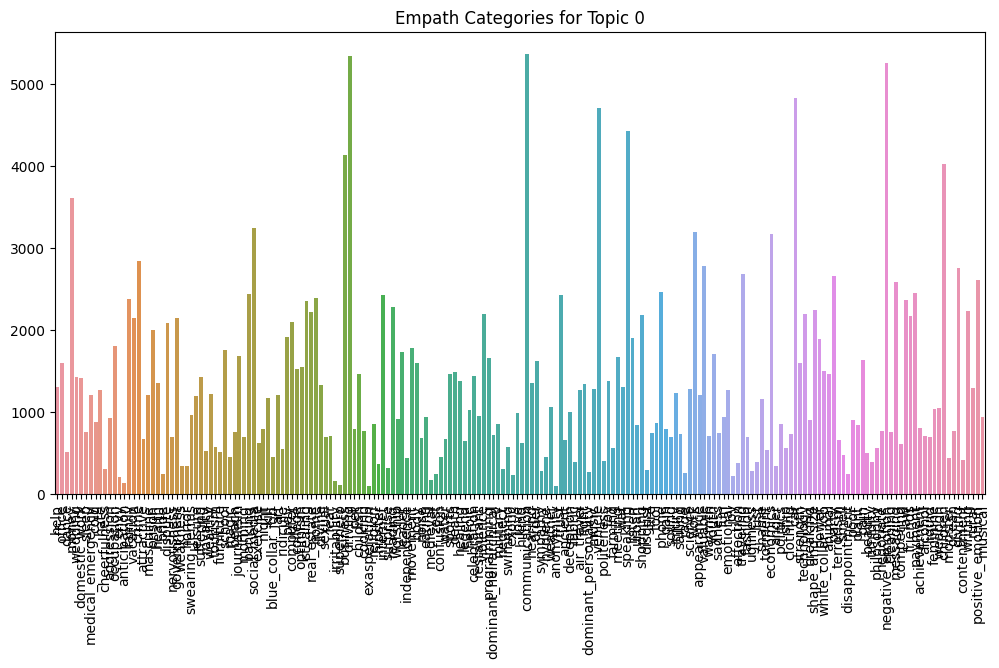

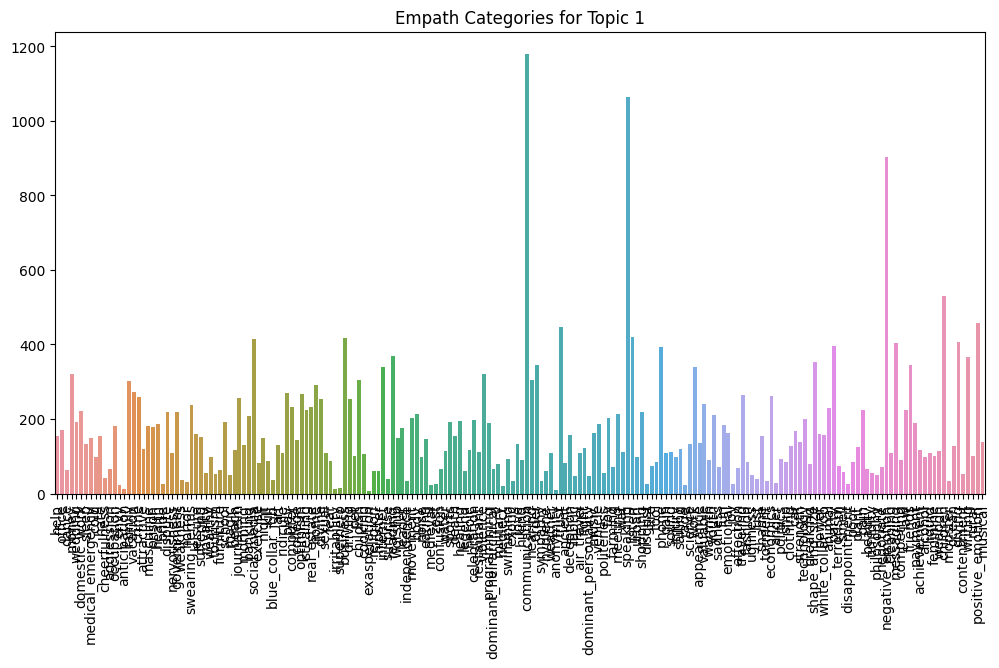

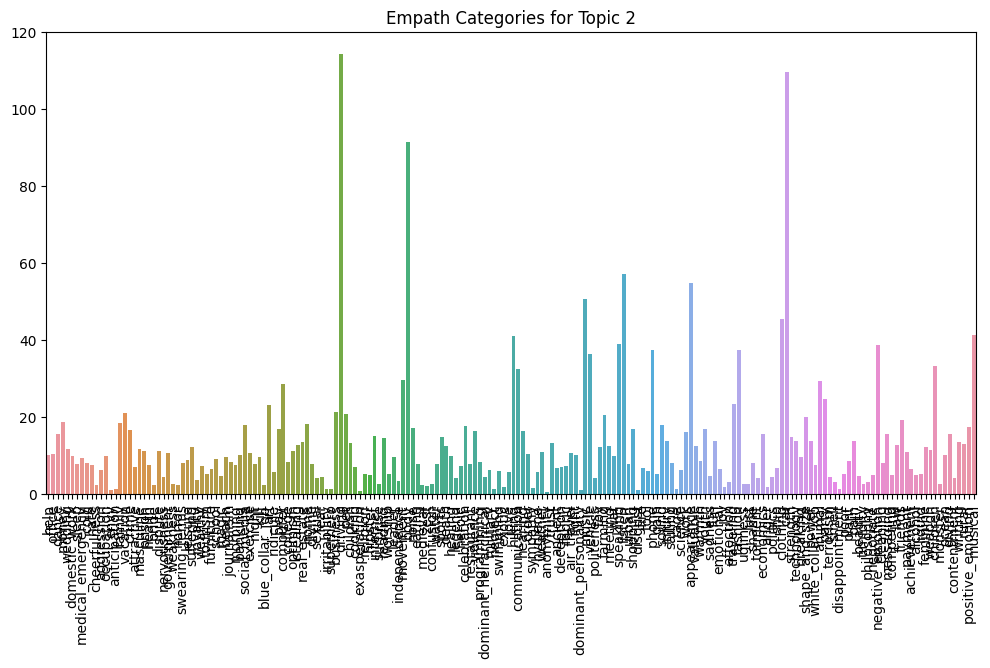

In [12]:

# Sum the empath categories for each topic
empath_sums = empath_df.groupby(df['new_topics_merged']).sum()

# Plot the empath categories for each topic
for topic_id in empath_sums.index:
    if topic_id != -1:  # Skip outliers
        plt.figure(figsize=(12, 6))
        sns.barplot(x=empath_sums.columns, y=empath_sums.loc[topic_id].values)
        plt.title(f"Empath Categories for Topic {topic_id}")
        plt.xticks(rotation=90)
        plt.show()


C:\Users\user\anaconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


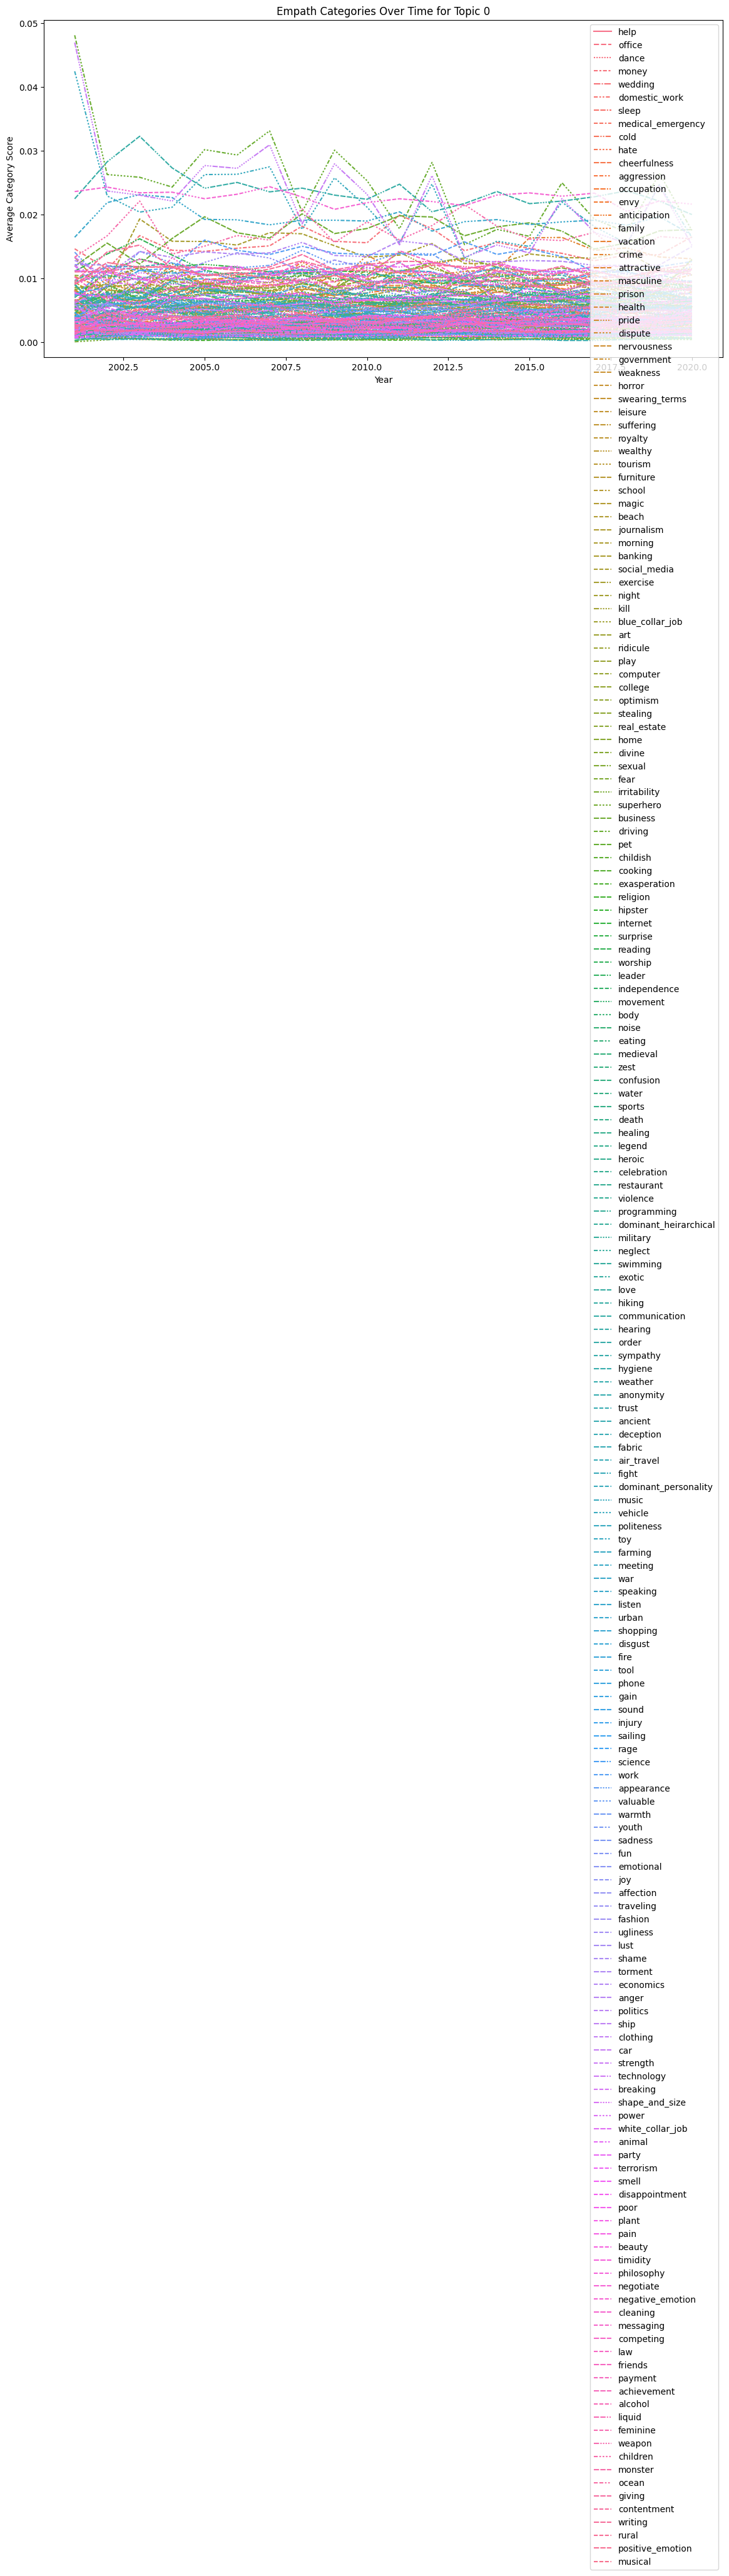

C:\Users\user\anaconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


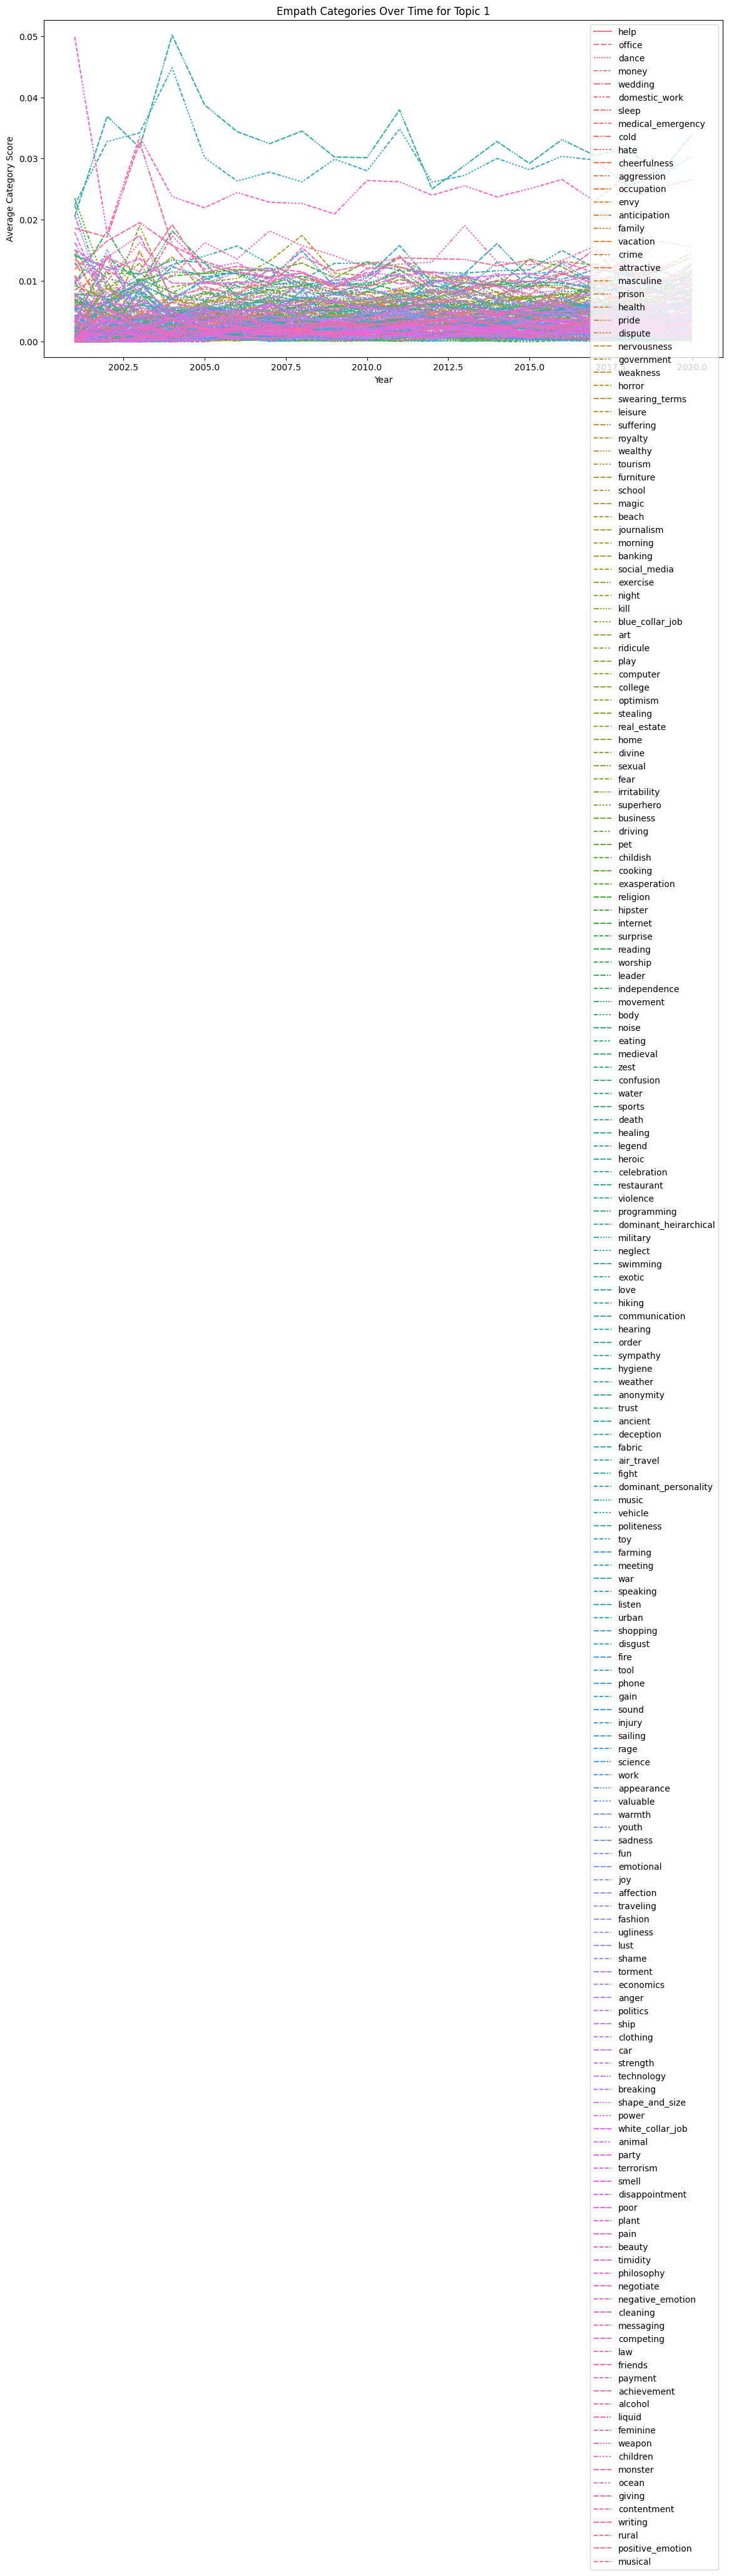

C:\Users\user\anaconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


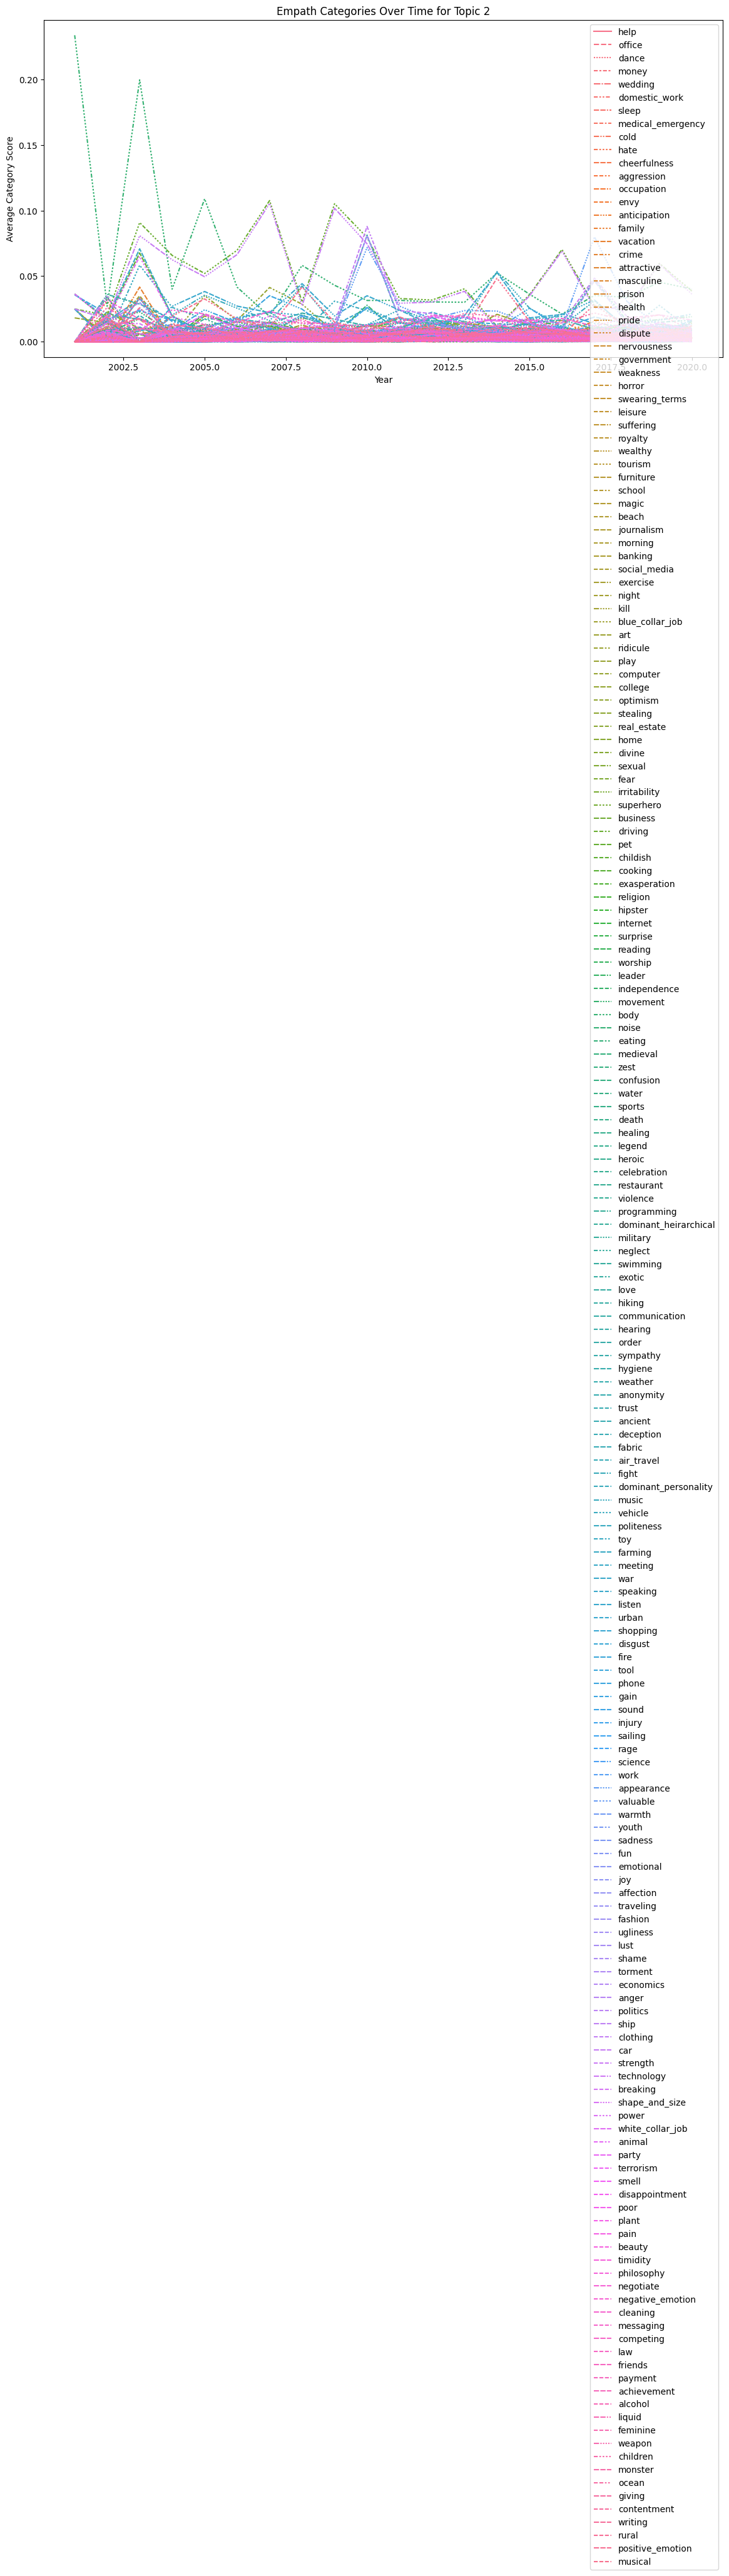

In [14]:
# Group by year and topic
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
empath_yearly = pd.concat([df['year'], empath_df], axis=1)
empath_yearly = empath_yearly.groupby(['year', df['new_topics_merged']]).mean()

# Plot the empath categories over time for each topic
for topic_id in df['new_topics_merged'].unique():
    if topic_id != -1:  # Skip outliers
        topic_trend = empath_yearly.xs(topic_id, level=1)
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=topic_trend)
        plt.title(f"Empath Categories Over Time for Topic {topic_id}")
        plt.xlabel('Year')
        plt.ylabel('Average Category Score')
        plt.legend(loc='upper right')
        plt.show()


In [ ]:
import pandas as pd
from empath import Empath
from tqdm import tqdm

# Load the CSV file
df = pd.read_csv("path_to_your_csv_file.csv")

# Initialize Empath
lexicon = Empath()

# Function to apply Empath categories
def analyze_empath(text):
    return lexicon.analyze(text, categories=["privacy", "safety", "personal_experience"], normalize=True)

# Apply the Empath categories with a progress bar
tqdm.pandas(desc="Applying Empath Analysis")
df['empath_analysis'] = df['processed_text'].progress_apply(analyze_empath)

# Save the DataFrame with the Empath analysis results
df.to_csv("path_to_save_empath_analysis.csv", index=False)

print("Empath analysis completed and saved to CSV.")


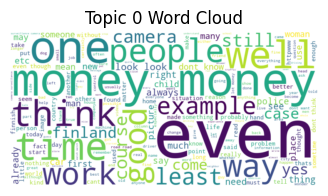

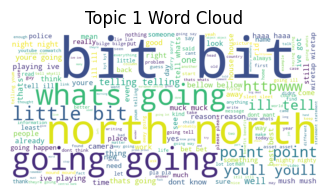

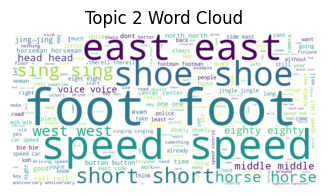

In [15]:

# Define a function to generate a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(4, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each topic
for topic_id in df['new_topics_merged'].unique():
    if topic_id != -1:  # Skip outliers
        topic_texts = ' '.join(df[df['new_topics_merged'] == topic_id]['processed_text'])
        generate_wordcloud(topic_texts, f"Topic {topic_id} Word Cloud")
